### Bank marketing project
Francis Afuwah, Batch No: D2312

### Introduction
The aim of this study is to model the success of marketing campaigns for a financial institution to convert term deposits into a subscription for their customers. Specifically, this proposal outlines a classification analysis task of determining strategies for increasing the success of subscription of term deposits over the phone and to whom they should be marketed. There are several reasons why we want to predict this. On a micro level, understanding what makes a customer subscribe to a term deposit gives insight into the effectiveness of the passing campaign and helps with the future design of campaigns within the bank. Understanding the type of customer who subscribes also gives the bank an idea of the user profile for future customers, decreasing large costs of marketing research on said customers. 

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

### Loading the dataset

In [2]:
train_df = pd.read_csv("termdeposit_train.csv")

In [3]:
# Displaying the first few rows of the dataset
print(train_df.head())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

In [4]:
# Displaying the last few rows of the dataset
print(train_df.tail())

          ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31

### Exploratory Data Analysis (EDA)

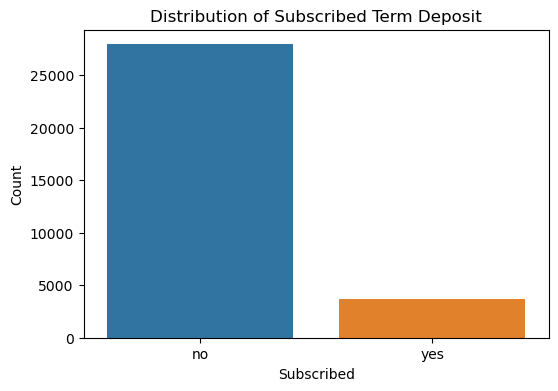

In [5]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='subscribed', data=train_df)
plt.title('Distribution of Subscribed Term Deposit')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

### Feature Engineering

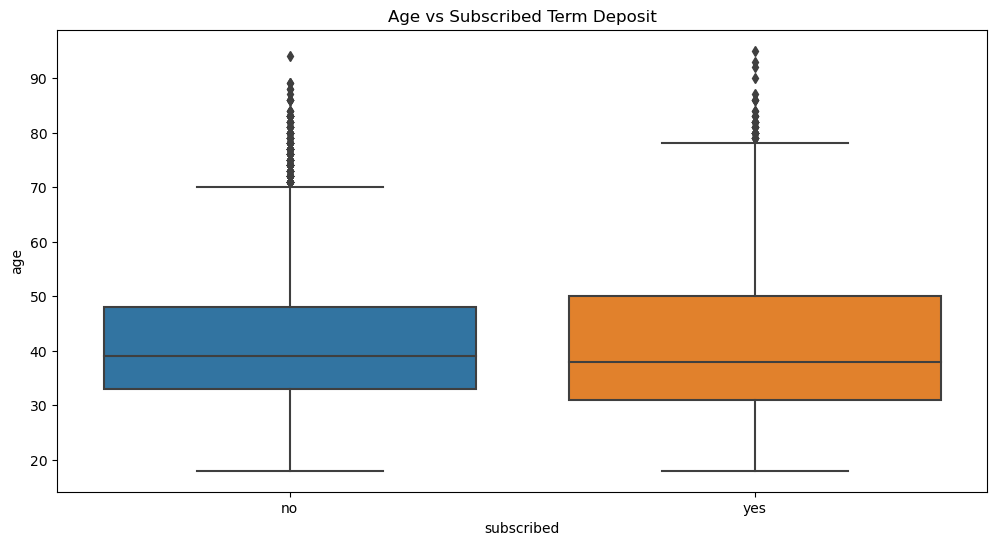

In [6]:
# Relationship between numerical features and target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='subscribed', y='age', data=train_df)
plt.title('Age vs Subscribed Term Deposit')
plt.show()

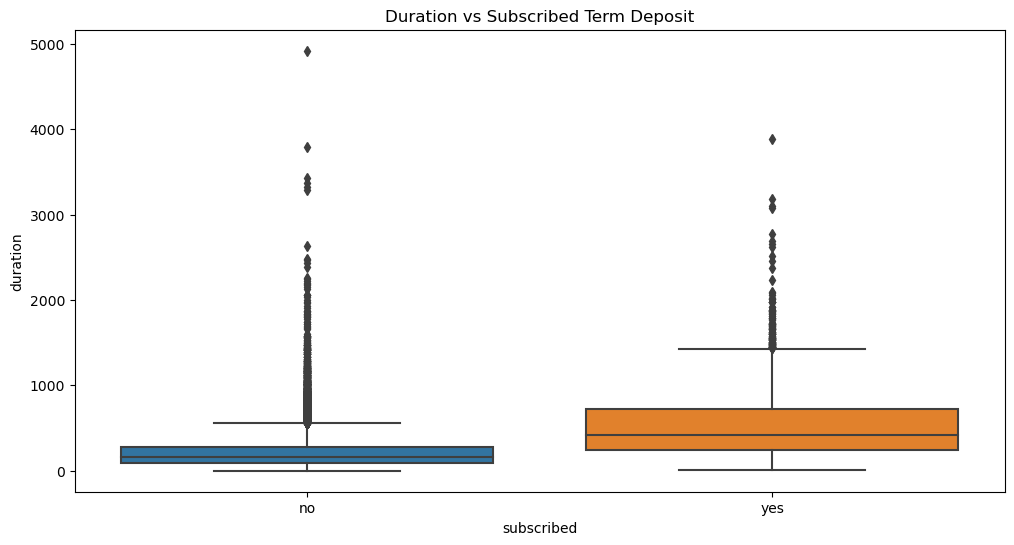

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subscribed', y='duration', data=train_df)
plt.title('Duration vs Subscribed Term Deposit')
plt.show()

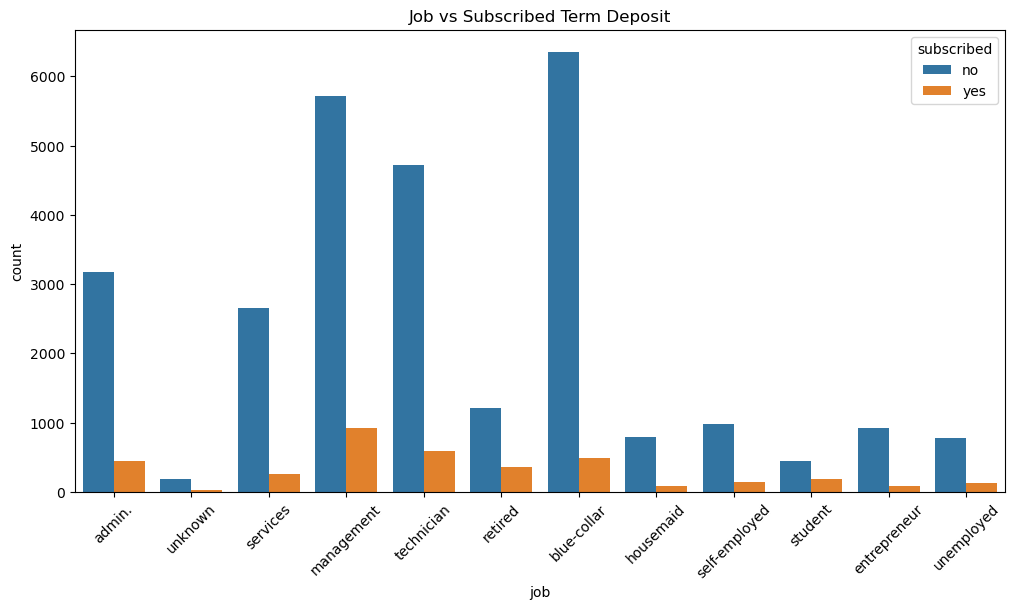

In [8]:
# Relationship between categorical features and target variable
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='subscribed', data=train_df)
plt.title('Job vs Subscribed Term Deposit')
plt.xticks(rotation=45)
plt.show()

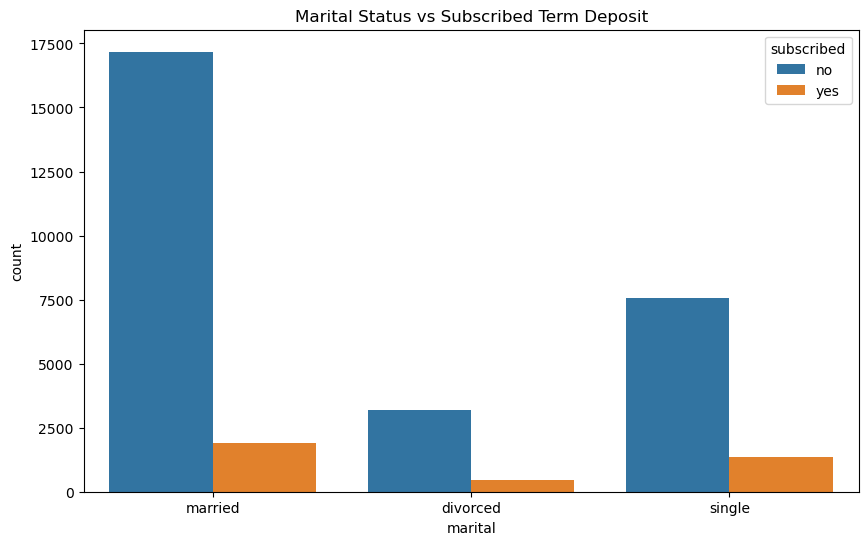

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='subscribed', data=train_df)
plt.title('Marital Status vs Subscribed Term Deposit')
plt.show()

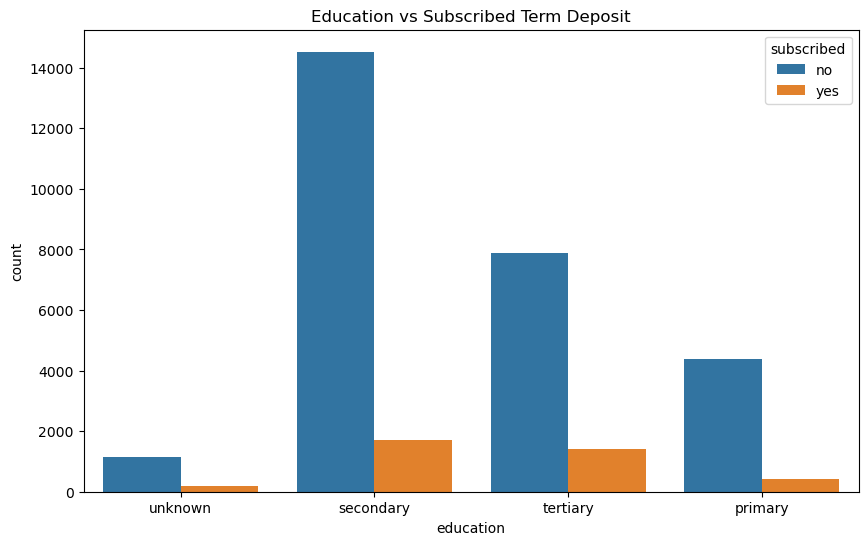

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='subscribed', data=train_df)
plt.title('Education vs Subscribed Term Deposit')
plt.show()

### Feature Engineering

In [11]:
# Encoding categorical variables
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
train_df_encoded = pd.get_dummies(train_df, columns=columns_to_encode, drop_first=True)


In [12]:
# Dropping irrelevant columns
train_df_encoded.drop(['ID'], axis=1, inplace=True)

In [13]:
# Separating features and target variable
X = train_df_encoded.drop('subscribed', axis=1)
y = train_df_encoded['subscribed']


### Handling missing values

In [14]:
train_df_encoded.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0


In [15]:
# Separating features and target variable
X = train_df_encoded.drop('subscribed', axis=1)
y = train_df_encoded['subscribed']

In [16]:
# Displaying the processed features
print(X.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   56     1933   19        44         2     -1         0            False   
1   31        3   20        91         2     -1         0            False   
2   27      891   18       240         1     -1         0            False   
3   57     3287   22       867         1     84         3            False   
4   31      119    4       380         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
0             False          False  ...      False      False      False   
1             False          False  ...       True      False      False   
2             False          False  ...       True      False      False   
3             False          False  ...      False       True      False   
4             False          False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      Fa

### Model Selection and Training

In [17]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)


In [18]:
# Initializing and training the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

c:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Make predictions on the test data using the trained model
The following steps will be performed in order to make predictions on the test data with the trained model:.

1. Load the test dataset (test.csv).
2. Preprocess test data in the same manner in which the training data were preprocessed category encoding and dropping irrelevant columns. 
3. Make inferences using the preprocessed test data with the trained model.

### Load the test data

In [19]:
test_df = pd.read_csv("termdeposit_test.csv")

### Preprocess test data

In [20]:
# Displaying the first few rows of the test dataset
print(test_df.head())

      ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown  


In [21]:
# Displaying the last few rows of the dataset
print(test_df.tail())

          ID  age          job  marital  education default  balance housing  \
13559  23465   39   management  married   tertiary      no       45      no   
13560  11743   54  blue-collar  married    primary      no     2281     yes   
13561  28292   35      retired  married    primary      no      285     yes   
13562  45163   29       admin.   single  secondary      no      464      no   
13563  34839   29       admin.  married  secondary      no        2     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
13559   no  cellular   28   aug       148         4     -1         0  unknown  
13560   no   unknown   20   jun       158         1     -1         0  unknown  
13561   no  cellular   29   jan       136         1     -1         0  unknown  
13562   no  cellular    9   nov       208         2     91         3  success  
13563   no  cellular    6   may       339         1    362         1  failure  


In [22]:
# Encoding categorical variables
test_df_encoded = pd.get_dummies(test_df, columns=columns_to_encode, drop_first=True)

In [23]:
# Dropping irrelevant columns
test_df_encoded.drop(['ID'], axis=1, inplace=True)

### Make predictions on the test data

In [24]:
# Making predictions on the test data using the trained model
test_predictions = log_reg_model.predict(test_df_encoded)

In [25]:
# Displaying the predictions
print(test_predictions)

['no' 'no' 'no' ... 'no' 'yes' 'no']


### Evalutae the model:
It was found that the Logistic Regression model, which had been trained and then tested for its performance on the test data, achieved an accuracy score of 0.901. In other words, approximately 90.1% of the test data had its outcome correctly predicted by the model.
The classification report can give even further detail about the metrics with respect to all classes, such as precision, recall, and F1-score, giving an insight into model performance across different classes.

In [26]:
# Making predictions on the test set
y_pred = log_reg_model.predict(X_test)

In [27]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9007204246713852


Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95     14014
         yes       0.62      0.33      0.43      1810

    accuracy                           0.90     15824
   macro avg       0.77      0.65      0.69     15824
weighted avg       0.88      0.90      0.89     15824



### Conclusion:
The analysis reveals very useful information on success factors in the marketing campaign of the term deposit subscription.
This leads the bank to optimize its marketing strategies, through customer demographics, behavior, and other such requisite, which in turn channels its audience most effectively to gain the most significance. Some further performance improvements can be achieved if the user experiments with several other machine learning algorithms, hyperparameters, or advanced feature engineering techniques to build the model.